### Jupyter Labの使い方Tips
#### **esc +**
esc + MでMarkdown，esc + Yでコード，esc + A/Bで現在のセルの上/下にセルを追加，esc + Xでセルをカット
#### **その他**
JupyterLabのメニュー「View」→「Show Line Numbers」にチェックを入れると、行番号が表示

Edit > Clear all outputで全てのセルの出力をクリア

<center>
    <h1>Generalized -Corey Correlation</h1>
</center>
    <div>
    Corey-Correlationを使った相対浸透率曲線をプロットするプログラム<br>
    Water / Oil Systemでは，水-油の相対浸透率はそれぞれ次のように書ける。<br><br>
    $$
    k_{ro} = k_{ro@S_{wi}}\left[\frac{1- S_w - S_{or}}{1-S_{iw}-S_{or}}\right]^{n_{o}}\tag{1}
    $$
    <br>
    $$
    k_{rw} = k_{rw@S_{or}}\left[\frac{S_w - S_{iw}}{1-S_{iw}-S_{or}}\right]^{n_{w}}\tag{2}
    $$
    <br>
    水-油-ガスの３相流はStoneの式（Stone1, Stone2がある）が有名。そのほかの近似式については<a href="https://www.ihsenergy.ca/support/documentation_ca/Harmony_Enterprise/2019_3/content/html_files/ref_materials/calculations/relative_permeability_correlations.htmhttps://www.ihsenergy.ca/support/documentation_ca/Harmony_Enterprise/2019_3/content/html_files/ref_materials/calculations/relative_permeability_correlations.htm">IHS MarkitのHP</a>や<a href = "https://petrowiki.spe.org/Relative_permeability_modelshttps://petrowiki.spe.org/Relative_permeability_models">PetroWiki</a>を参考にされたい。
   

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input Paramters
Sw  = np.linspace(0, 1, 1000, endpoint=True); # Saturation of water
Swi = 0.23; # Residual water saturation [-]
Sor = 0.23; # Residual oil saturation  [-]

kro_Swi = 0.3 # 0 <= value <= 1, Oil Relative permeability @ Sw = Swi [-]
krw_Sor = 0.95 # 0 <= value <= 1, Water Relative permeability @ So = Sor [-]

no      = 2; # exponent of eq.(1)
nw      = 2; # exponent of eq.(2)

In [3]:
# これではだめ
kro = kro_Swi*((1 - Sw - Sor) / (1 - Swi - Sor))**no
krw = krw_Sor*((Sw - Swi) / (1 - Swi - Sor))**nw

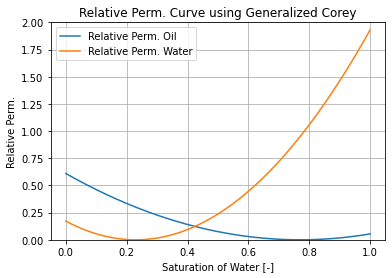

In [4]:
# Object指向で書く
fig = plt.figure();
ax = fig.add_subplot();
ax.plot(Sw, kro, label = "Relative Perm. Oil")
ax.plot(Sw, krw, label = "Relative Perm. Water")
ax.set_title("Relative Perm. Curve using Generalized Corey")
ax.set_xlabel("Saturation of Water [-]")
ax.set_ylabel("Relative Perm.")
ax.set_ylim([0,2])
ax.grid()
ax.legend()

In [6]:
# 以下修正
# Relative Perm. Water
krw[np.where( Sw <= Swi)] = 0
krw[np.where( Sw >= (1-Sor))] = krw_Sor

# Relative Perm. Oil
kro[np.where( Sw <= Swi)] = kro_Swi
kro[np.where( Sw >= (1-Sor))] = 0

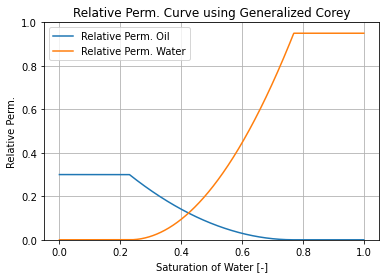

In [7]:
# Object指向で書く
fig = plt.figure();
ax = fig.add_subplot();
ax.plot(Sw, kro, label = "Relative Perm. Oil")
ax.plot(Sw, krw, label = "Relative Perm. Water")
ax.set_title("Relative Perm. Curve using Generalized Corey")
ax.set_xlabel("Saturation of Water [-]")
ax.set_ylabel("Relative Perm.")
ax.set_ylim([0,1])
ax.grid()
ax.legend()

<center><a href="../../index.html">戻る</a></center>